In [101]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as  plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import explained_variance_score, max_error, mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix
import seaborn as sea
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor


def quality_metrics(marks, preds):
    """
    Функция выводит значения основных показателей качества обучения модели
    """
    print("explained_variance_score: {0:.9f}".format(explained_variance_score(marks, preds)))
    print("max_error: {0:.9f}".format(max_error(marks, preds)))
    print("mean_squared_error: {0:.9f}".format(mean_squared_error(marks, preds)))
    print("mean_absolute_error: {0:.9f}".format(mean_absolute_error(marks, preds)))

def graph(x, y, z):
        fig = plt.figure()
        ax = fig.add_subplot(1, 2, 1, projection='3d')
        ax.scatter(X_test[x], X_test[y], X_test[z], c=y_test)
        ax.set_xlabel(x)
        ax.set_ylabel(y)
        ax.set_zlabel(z)
        ax.legend()
        plt.title('Реальные классы')
        ax = fig.add_subplot(1, 2, 2, projection='3d')
        ax.scatter(X_test[x], X_test[y], X_test[z], c=preds)
        ax.set_xlabel(x)
        ax.set_ylabel(y)
        ax.set_zlabel(z)
        ax.legend()
        plt.title('Работа модели')
        plt.show()

In [102]:
df = pd.read_csv(r'garpixxx (3).csv')

In [103]:
df.columns

Index(['density_percents', 'loading_sizes', 'group', 'mas'], dtype='object')

Нормализация данных

In [234]:
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
names = df.columns
d = scaler.fit_transform(df)
df = pd.DataFrame(d, columns=names)

In [235]:
df.head()

,density_percents,loading_sizes,group,mas
0,0.569707,0.621971,0.6,0.000039
1,0.601055,0.448884,0.4,0.009958
2,0.595685,0.628143,0.6,0.000007
3,0.707307,0.690030,0.6,0.000010
4,0.537850,0.471281,0.4,0.000000


In [105]:
# f = plt.figure(figsize=(19, 15))
# plt.matshow(df.corr(), fignum=f.number)
# plt.xticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14, rotation=45)
# plt.yticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14)
# cb = plt.colorbar()
# cb.ax.tick_params(labelsize=14)
# plt.title('Correlation Matrix', fontsize=16)

хорошая корреляция между group и loading sizes

<Axes: >

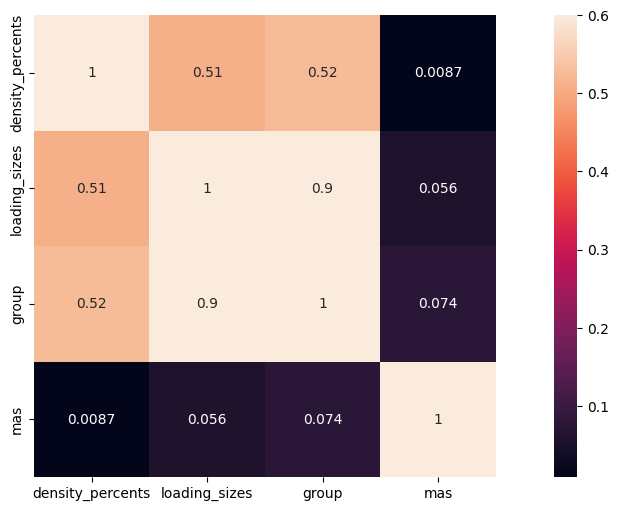

In [106]:
plt.figure(figsize=(15,6))
sea.heatmap(df.corr(), vmax=0.6, square=True, annot=True)

In [107]:
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(columns=['density_percents']), df['density_percents'], test_size=0.2, random_state=123)

random_state - одинак. результаты на разных компах

In [108]:
clf = LinearRegression( n_jobs=-1)
clf.fit(X_train, y_train)

preds = clf.predict(X_test)

quality_metrics(y_test, preds)
r_sq = clf.score(X_test, y_test)
print('coefficient of determination:', r_sq)

explained_variance_score: 0.293262841
max_error: 0.628999229
mean_squared_error: 0.044498310
mean_absolute_error: 0.163088886
coefficient of determination: 0.27417010500618166


coefficient of determination - качество модели
n_jobs=-1 - на всех ядрах компа

In [109]:
# graph('loading_sizes', 'group', 'mas')

In [110]:
reg = KNeighborsRegressor(n_neighbors=9)
reg.fit(X_train, y_train)

preds = reg.predict(X_test)


quality_metrics(y_test, preds)
r_sq = clf.score(X_test, y_test)
print('coefficient of determination:', r_sq)
# graph('loading_sizes', 'group', 'mas')

explained_variance_score: 0.324903584
max_error: 0.683370428
mean_squared_error: 0.042284625
mean_absolute_error: 0.154078479
coefficient of determination: 0.27417010500618166


In [111]:
X_test.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 126 entries, 466 to 616
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   loading_sizes  126 non-null    float64
 1   group          126 non-null    float64
 2   mas            126 non-null    float64
dtypes: float64(3)
memory usage: 3.9 KB


explained_variance_score: 0.314443520
max_error: 0.776550359
mean_squared_error: 0.042881803
mean_absolute_error: 0.132106046
coefficient of determination: 0.300537618974528


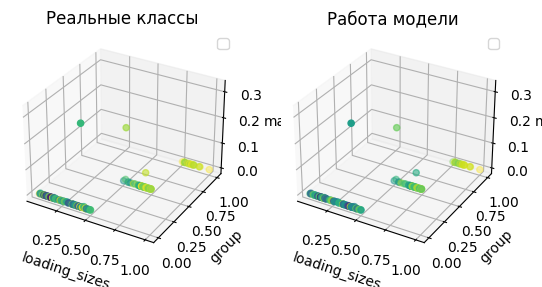

In [112]:
reg = RandomForestRegressor(n_estimators=1000)
reg.fit(X_train, y_train)
preds = reg.predict(X_test)
quality_metrics(y_test, preds)
r_sq = reg.score(X_test, y_test)
print('coefficient of determination:', r_sq)
# graph('loading_sizes', 'group', 'mas')

коэф детерминации низкий у всех моделей, следует поработь с параметрами модели и предобработать признаки

In [113]:
import xgboost as xb

In [114]:
params = {
    "objective": "reg:squarederror",
    "n_estimators":100,
    "max_depth": 4,
    "learning_rate": 0.01,
    "subsample": 0.8,
    "colsample_bytree": 0.9,
    "colsample_bylevel": 0.8,
    "reg_lambda": 0.1,
    "eval_metric": "rmse",
    "random_state": 42,
}

In [115]:
reg = xb.XGBRegressor()

In [116]:
reg.fit(X_train,
        y_train,
        verbose=False,
        eval_set= [(X_train, y_train), (X_test, y_test)],
        early_stopping_rounds= 0.1
        )

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [117]:
results = reg.evals_result()

In [118]:
print(f'Determination: {reg.score(X_train, y_train, sample_weight=None)}')

Determination: 0.4572506972841134


In [119]:
print(f'Determination: {reg.score(X_test, y_test, sample_weight=None)}')

Determination: 0.2778550432968404


RMSE - mean_squared_error

In [120]:
results['validation_1']['rmse'][-1]

0.2105604486178035

validation_1 -  3 выборка,

In [121]:
best_iter = reg.best_iteration
best_iter

4

In [122]:
results['validation_1']['rmse'][best_iter]

0.210410072699963

MSE

In [123]:
y_pred = reg.predict(X_test)

mean_squared_error(y_test, y_pred, squared = False)

0.2104100727327081

RMSE during training

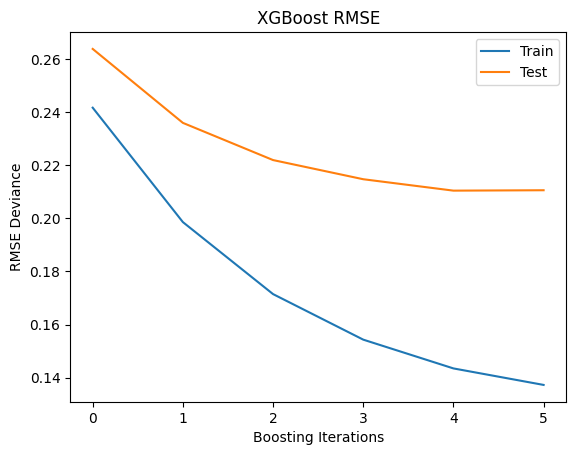

In [124]:
epochs = len(results['validation_0']['rmse'])
x_axis = range(0, epochs)

fig, ax = plt.subplots()

ax.plot(x_axis, results['validation_0']['rmse'], label='Train')
ax.plot(x_axis, results['validation_1']['rmse'], label='Test')

plt.title('XGBoost RMSE')
plt.xlabel("Boosting Iterations")
plt.ylabel("RMSE Deviance")
plt.legend(loc="upper right");

Feature Importance

In [125]:
reg.feature_importances_

array([0.696306, 0.      , 0.303694], dtype=float32)

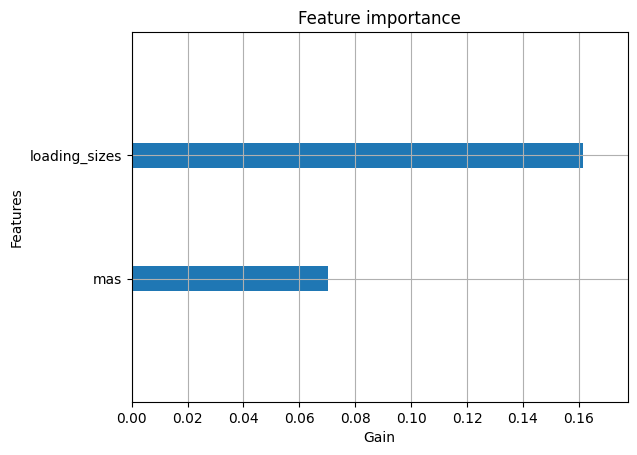

In [126]:
xb.plot_importance(reg,
                    importance_type="gain",
                    show_values=False,
                    xlabel="Gain");

Странно почему нет групп, ведь корреляция сильная была

Модели все не оч, но буст дал лучший результат. нужно поиграться с параметрами в моделях random/grid searchcv и найти лучшие. столб с группой лучше следует привести к бинарному виду (one hot coding),но тогда признаки увеличатся по числу значений в столбе группы, либо также нормализовать. он категориальный, а регрессия не очень хорошо работает с категориальными, хотя случайнsq лес нормально, как и буст.

One hot encoding

In [127]:
from sklearn.preprocessing import OneHotEncoder

In [128]:
encoder = OneHotEncoder()
groups_2d = df['group'].values.reshape(-1, 1)
onehot_encoded = encoder.fit_transform(groups_2d)

# Convert the sparse matrix result to a DataFrame
onehot_encoded_df = pd.DataFrame(onehot_encoded.toarray(), columns=encoder.get_feature_names_out(['group']))

# Concatenate the one-hot encoded DataFrame with the original DataFrame
df_encoded = pd.concat([df, onehot_encoded_df], axis=1)

# Drop the original 'group' column
df_encoded.drop(columns=['group'], inplace=True)

In [129]:
df_encoded.head()

,density_percents,loading_sizes,mas,group_0.0,group_0.5,group_1.0
0,0.569707,0.621971,0.000039,0.0,1.0,0.0
1,0.601055,0.448884,0.009958,1.0,0.0,0.0
2,0.595685,0.628143,0.000007,0.0,1.0,0.0
3,0.707307,0.690030,0.000010,0.0,1.0,0.0
4,0.537850,0.471281,0.000000,1.0,0.0,0.0


In [130]:
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(columns=['density_percents']), df['density_percents'], test_size=0.2, random_state=123)

In [131]:
reg = RandomForestRegressor(n_estimators=1000)
reg.fit(X_train, y_train)
preds = reg.predict(X_test)
quality_metrics(y_test, preds)
r_sq = reg.score(X_test, y_test)
print('coefficient of determination:', r_sq)

explained_variance_score: 0.324234798
max_error: 0.767693854
mean_squared_error: 0.042290920
mean_absolute_error: 0.130933720
coefficient of determination: 0.31017573697200385


In [132]:
# reg.predict(dfin)

Чуть больше стал score

In [133]:
params = {
    "objective": "reg:squarederror",
    "n_estimators":100,
    "max_depth": 4,
    "learning_rate": 0.01,
    "subsample": 0.8,
    "colsample_bytree": 0.9,
    "colsample_bylevel": 0.8,
    "reg_lambda": 0.1,
    "eval_metric": "rmse",
    "random_state": 42,
}

In [134]:
reg = xb.XGBRegressor()

In [135]:
reg.fit(X_train,
        y_train,
        verbose=False,
        eval_set= [(X_train, y_train), (X_test, y_test)],
        early_stopping_rounds= 0.1
        )

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [136]:
print(f'Determination: {reg.score(X_train, y_train, sample_weight=None)}')

Determination: 0.4572506972841134


In [137]:
print(f'Determination: {reg.score(X_test, y_test, sample_weight=None)}')

Determination: 0.2778550432968404


На тестовой стал лучше, на трейне чуть хуже.

In [138]:
dfin = pd.read_csv('input.csv')


In [139]:
dfin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   loading_sizes     1 non-null      float64
 1   density_percents  1 non-null      object 
 2   group             1 non-null      object 
 3   mass              1 non-null      float64
dtypes: float64(2), object(2)
memory usage: 160.0+ bytes


In [140]:
dfin.head

<bound method NDFrame.head of    loading_sizes density_percents            group  mass
0         34.219  <class 'float'>  <class 'float'>  15.0>

In [141]:
dfin['group'] = dfin['loading_sizes'].copy()


In [142]:
dfin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   loading_sizes     1 non-null      float64
 1   density_percents  1 non-null      object 
 2   group             1 non-null      float64
 3   mass              1 non-null      float64
dtypes: float64(3), object(1)
memory usage: 160.0+ bytes


In [143]:
dfin.loc[(dfin['group'] >= 0) & (dfin['group'] < 50), 'group'] = 1
dfin.loc[(dfin['group'] >= 50) & (dfin['group'] < 75), 'group'] = 2
dfin.loc[(dfin['group'] >= 75) & (dfin['group'] <= 100), 'group'] = 3

In [144]:
dfin = dfin.drop(columns = ['density_percents'])

In [145]:
dfin = dfin.rename(columns={"mass": "mas"})

In [146]:
preds_input = reg.predict(dfin)
print(preds_input)

[0.83339155]


In [147]:
dfin


,loading_sizes,group,mas
0,34.219,1.0,15.0


** Вторая часть**

In [148]:
# from sklearn.tree import DecisionTreeClassifier

In [ ]:
# clf = DecisionTreeClassifier()
# clf.fit(X_train, y_train)
# y_pred_decision_tree = clf.predict(X_test)
# acc_decision_tree = round(clf.score(X_train, y_train) * 100, 2)
# print (acc_decision_tree)

In [228]:
df = pd.read_csv(r'garpixxx (3).csv')

In [229]:
df.head()

,density_percents,loading_sizes,group,mas
0,62.12352,61.22618,2.0,73.49
1,64.88293,44.18843,1.0,18778.00
2,64.41020,61.83379,2.0,13.50
3,74.23567,67.92564,2.0,19.60
4,59.31931,46.39305,1.0,0.00


In [230]:
df['group'] = df['loading_sizes'].copy()

In [231]:
df.loc[(df['group'] >= 0) & (df['group'] < 34), 'group'] = 1
df.loc[(df['group'] >= 34) & (df['group'] < 44), 'group'] = 2
df.loc[(df['group'] >= 44) & (df['group'] < 58), 'group'] = 3
df.loc[(df['group'] >= 58) & (df['group'] < 72), 'group'] = 4
df.loc[(df['group'] >= 72) & (df['group'] < 86), 'group'] = 5
df.loc[(df['group'] >= 86) & (df['group'] <= 100), 'group'] = 6

In [232]:
df.head()

,density_percents,loading_sizes,group,mas
0,62.12352,61.22618,4.0,73.49
1,64.88293,44.18843,3.0,18778.00
2,64.41020,61.83379,4.0,13.50
3,74.23567,67.92564,4.0,19.60
4,59.31931,46.39305,3.0,0.00


In [193]:
df['group'].value_counts()

1.0    150
4.0    129
5.0    124
3.0     99
2.0     88
6.0     37
Name: group, dtype: int64

In [ ]:
plt.scatter(df['density_percents'], df['loading_sizes'], label='data', c='b')

In [ ]:
# for index, row in df.iterrows():
#   if row == 2:
# print(df['density_percents'])

Нормализация данных

In [194]:
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
names = df.columns
d = scaler.fit_transform(df)
df = pd.DataFrame(d, columns=names)

In [195]:
df.head()

,density_percents,loading_sizes,group,mas
0,0.569707,0.621971,0.6,0.000039
1,0.601055,0.448884,0.4,0.009958
2,0.595685,0.628143,0.6,0.000007
3,0.707307,0.690030,0.6,0.000010
4,0.537850,0.471281,0.4,0.000000


In [196]:
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(columns=['density_percents']), df['density_percents'], test_size=0.2, random_state=123)

In [197]:
clf = LinearRegression( n_jobs=-1)
clf.fit(X_train, y_train)

preds = clf.predict(X_test)

quality_metrics(y_test, preds)
r_sq = clf.score(X_test, y_test)
print('coefficient of determination:', r_sq)

explained_variance_score: 0.305751311
max_error: 0.613792466
mean_squared_error: 0.043627544
mean_absolute_error: 0.161886623
coefficient of determination: 0.28837353023199297


Чуть больше стал score у регрессии

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [198]:
encoder = OneHotEncoder()
groups_2d = df['group'].values.reshape(-1, 1)
onehot_encoded = encoder.fit_transform(groups_2d)

# Convert the sparse matrix result to a DataFrame
onehot_encoded_df = pd.DataFrame(onehot_encoded.toarray(), columns=encoder.get_feature_names_out(['group']))

# Concatenate the one-hot encoded DataFrame with the original DataFrame
df_encoded = pd.concat([df, onehot_encoded_df], axis=1)

# Drop the original 'group' column
df_encoded.drop(columns=['group'], inplace=True)

In [200]:
df = df_encoded.copy()

In [222]:
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(columns=['density_percents']), df['density_percents'], test_size=0.2, random_state=123)

In [202]:
reg = RandomForestRegressor(n_estimators=1000)
reg.fit(X_train, y_train)
preds = reg.predict(X_test)
quality_metrics(y_test, preds)
r_sq = reg.score(X_test, y_test)
print('coefficient of determination:', r_sq)

explained_variance_score: 0.307813520
max_error: 0.783493587
mean_squared_error: 0.043266698
mean_absolute_error: 0.133285600
coefficient of determination: 0.29425943016758993


У деревьев score стал хуже

In [203]:
# @title Текст заголовка по умолчанию
# from sklearn.model_selection import GridSearchCV
# from sklearn.model_selection import RandomizedSearchCV

In [204]:
# def search_and_draw(X, y, model, param_name, grid, param_scale='ordinary', draw=True):
#     parameters = {param_name: grid}

#     CV_model = GridSearchCV(estimator=model,
#                             param_grid=parameters,
#                             cv=5,
#                             scoring='f1',
#                             n_jobs=-1,
#                             verbose=10)
#     CV_model.fit(X, y)
#     means = CV_model.cv_results_['mean_test_score']
#     error = CV_model.cv_results_['std_test_score']

#     if draw:
#         plt.figure(figsize=(15,8))
#         plt.title('choose ' + param_name)


#         if (param_scale == 'log'):
#             plt.xscale('log')

#         plt.plot(grid, means, label='mean values of score', color='red', lw=3)

#         plt.fill_between(grid, means - 2 * error, means + 2 * error,
#                          color='green', label='filled area between errors', alpha=0.5)
#         legend_box = plt.legend(framealpha=1).get_frame()
#         legend_box.set_facecolor("white")
#         legend_box.set_edgecolor("black")
#         plt.xlabel('parameter')
#         plt.ylabel('roc_auc')
#         plt.show()

#     return means, error

In [205]:
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.tree import DecisionTreeClassifier

In [208]:
# models = [KNeighborsClassifier(), DecisionTreeClassifier()]
# param_names = ['n_neighbors', 'max_depth']
# grids = [np.array(np.linspace(4, 30, 8), dtype='int'), np.arange(1, 30)]
# param_scales = ['log', 'ordinary']

In [ ]:
# for model, param_name, grid, param_scale in zip(models,
#                                                 param_names,
#                                                 grids,
#                                                 param_scales):
#     search_and_draw(X_train, y_train, model, param_name, grid, param_scale)

In [214]:
# from sklearn.pipeline import Pipeline
# from sklearn.model_selection import GridSearchCV
# from sklearn.preprocessing import StandardScaler
# from sklearn import linear_model, decomposition, datasets

In [215]:
# std_slc = StandardScaler()

In [216]:
# pca = decomposition.PCA()

In [217]:
# logistic_Reg = linear_model.LogisticRegression()

In [218]:
# pipe = Pipeline(steps=[('std_slc', std_slc),
#                         ('pca', pca),
#                         ('logistic_Reg', logistic_Reg)])

In [ ]:
# n_components = list(range(1,X_train.shape[1]+1,1))

In [ ]:
# C = np.logspace(-4, 4, 50)
#     penalty = ['l1', 'l2']

In [ ]:
# parameters = dict(pca__n_components=n_components,
#                   logistic_Reg__C=C,
#                   logistic_Reg__penalty=penalty)

In [225]:
def Grid_Search_CV_RFR(X_train, y_train):
    from sklearn.model_selection import GridSearchCV
    from sklearn.model_selection import ShuffleSplit
    from sklearn.ensemble import RandomForestRegressor

    estimator = RandomForestRegressor()
    param_grid = {
            "n_estimators"      : [10,20,30],
            "max_features"      : ["auto", "sqrt", "log2"],
            "min_samples_split" : [2,4,8],
            "bootstrap": [True, False],
            }

    grid = GridSearchCV(estimator, param_grid, n_jobs=-1, cv=5)

    grid.fit(X_train, y_train)

    return grid.best_score_ , grid.best_params_

def RFR(X_train, X_test, y_train, y_test, best_params):
    from sklearn.ensemble import RandomForestRegressor
    estimator = RandomForestRegressor(n_jobs=-1).set_params(**best_params)
    estimator.fit(X_train,y_train)
    y_predict = estimator.predict(X_test)
    print (r2(y_test,y_predict))
    return y_test,y_predict

def splitter_v2(tab,y_indicator):
    from sklearn.model_selection import train_test_split
    # Asignamos X e y, eliminando la columna y en X
    X = correlacion(tab,y_indicator)
    y = tab[:,y_indicator]
    # Separamos Train y Test respectivamente para X e y
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    return X_train, X_test, y_train, y_test

In [227]:
Grid_Search_CV_RFR(X_train, y_train)

(0.26449224387543413,
 {'bootstrap': True,
  'max_features': 'log2',
  'min_samples_split': 8,
  'n_estimators': 30})

GridSearch для RandomForestRegressor дал хуже результаты.

In [ ]:
# for i in range(5):
#     print "Loop: " , i
#     print "--------------"
#     X_train, X_test, y_train, y_test = splitter_v2(tabla,1)
#     best_score, best_params = Grid_Search_CV_RFR(X_train, y_train)
#     y_test , y_predict = RFR(X_train, X_test, y_train, y_test, best_params)
#     print "Best Score:" ,best_score
#     print "Best params:",best_params